In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 모델 튜닝 - 하이퍼파라미터 튜닝

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.8333333333333334

In [4]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.9385964912280702

### 검증세트 활용

In [5]:
cancer = load_breast_cancer()

X_train_all, X_test, y_train_all, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=42)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.6929824561403509

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# k-Fold : k - cv(5개분할)
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
logistic = LogisticRegression(random_state=42)

scores = cross_val_score(logistic, X, y)
scores

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

array([0.92982456, 0.93859649, 0.95614035, 0.92105263, 0.95575221])

In [10]:
print('교차검증 평균점수 : {:.2f}'.format(scores.mean()))

교차검증 평균점수 : 0.94


In [12]:
# 다중평가지표 : cross_validate(), 분할마다 훈련과 테스트에 걸린 시간과
# 설정에 따라 훈련데이터와 테스트데이터의 점수도 얻을 수 있다.
from sklearn.model_selection import cross_validate
res = cross_validate(logistic, X, y, return_train_score=True)
res

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

{'fit_time': array([0.03900218, 0.03452134, 0.0359993 , 0.03399897, 0.03399873]),
 'score_time': array([0.        , 0.00100064, 0.        , 0.        , 0.        ]),
 'test_score': array([0.92982456, 0.93859649, 0.95614035, 0.92105263, 0.95575221]),
 'train_score': array([0.95164835, 0.94505495, 0.94505495, 0.95164835, 0.94736842])}

In [13]:
import pandas as pd
import mglearn
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수 : \n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.039002,0.000000,0.929825,0.951648
1,0.034521,0.001001,0.938596,0.945055
2,0.035999,0.000000,0.956140,0.945055
3,0.033999,0.000000,0.921053,0.951648
4,0.033999,0.000000,0.955752,0.947368


평균 시간과 점수 : 
 fit_time       0.035504
score_time     0.000200
test_score     0.940273
train_score    0.948155
dtype: float64


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
scores = cross_val_score(logistic, X, y, cv=3)
scores

array([0.93157895, 0.96842105, 0.93121693])

In [16]:
print('교차검증 평균점수 : {:.2f}'.format(scores.mean()))

교차검증 평균점수 : 0.94


### 일반화, 과대적합, 과소적합

In [17]:
# 시각화 한글처리
import matplotlib as mpl

# 폰트 설정
mpl.rc('font', family = 'NanumGothic')

# 유니코드에서 음수 부호설정
mpl.rc('axes', unicode_minus=False)

X.shape :(26, 2)


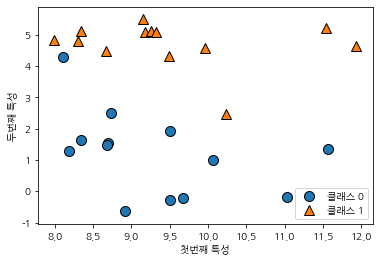

In [18]:
X, y= mglearn.datasets.make_forge()

# 산점도 그래프
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')
print('X.shape :{}'.format(X.shape))

### Knn(k-최근접 이웃)
- 가장 간단한 머신러닝 알고리즘
- 훈련데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부이다.
- 훈련 데이터 샘플 하나를 최근접 이웃으로 찾아 예측에 사용한다.

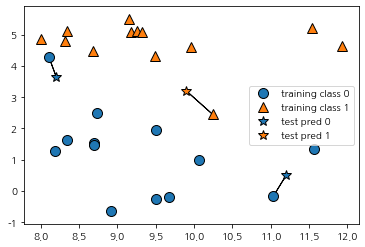

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

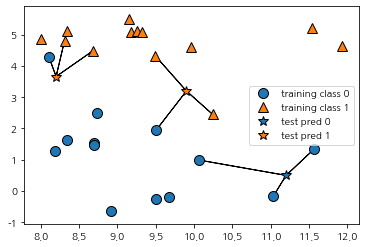

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [21]:
# train과 test 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [23]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
print('테스트 데이터 예측 : {}'.format(clf.predict(X_test)))

테스트 데이터 예측 : [1 0 1 0 1 0 0]


In [25]:
print('테스트 데이터 정확도 : {:.2f}'.format(clf.score(X_test, y_test)))

테스트 데이터 정확도 : 0.86


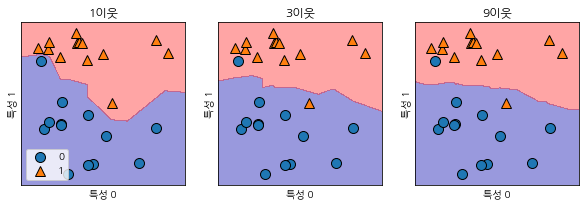

In [26]:
# 결정 경계(decision boundary) : 각각의 클래스로 지정한 영역을 나누는 경계
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# 이웃의 수 1, 3, 9
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title('{}이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)


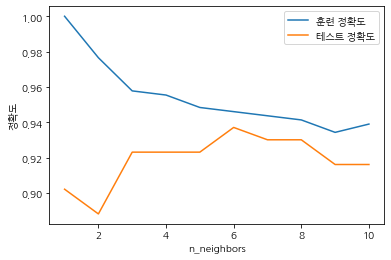

In [30]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)

training_accuracy=[]
test_accuracy=[]

neighbors_setting=range(1, 11)

for n_neighbors in neighbors_setting:
    # 모델생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련데이터 정확도
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_setting, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_setting, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

In [31]:
import tensorflow as tf

In [32]:
tf.__version__

'2.0.0'

### 난수생성

In [33]:
# 균일분포(uniform) : 최소값과 최대값 사이의 모든 수가 나올 확률이 동일
# 정규분포(normal) : 평균과 표준편차
rand = tf.random.uniform([1], 0, 1)  # shape, 최소값, 최대값
rand

<tf.Tensor: id=6, shape=(1,), dtype=float32, numpy=array([0.6475817], dtype=float32)>

In [34]:
rand = tf.random.normal([1], 0, 1) # shape, 평균, 표준편차
rand

<tf.Tensor: id=12, shape=(1,), dtype=float32, numpy=array([-0.4448891], dtype=float32)>

In [35]:
rand = tf.random.uniform([4], 0, 1)
rand

<tf.Tensor: id=19, shape=(4,), dtype=float32, numpy=array([0.49530327, 0.64804876, 0.15941942, 0.59583235], dtype=float32)>

In [36]:
rand = tf.random.normal([4], 0, 1)
rand

<tf.Tensor: id=25, shape=(4,), dtype=float32, numpy=array([-1.3481115 , -1.0527427 , -0.67774373,  0.16339572], dtype=float32)>

### 뉴런 - 로지스틱 회귀모형

In [37]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [38]:
# y = ax+b
x = 1
y = 0
w = tf.random.normal([1], 0, 1)
output = sigmoid(x * w)
output

0.09850863203924315

In [39]:
# 경사하강법 : w에 입력과 학습률과 에러를 곱한 값을 더해주는 것
# 학습률을 w 업데이트한다.
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.051583296386986104 0.051583296386986104
199 -0.0344992310885211 0.0344992310885211
299 -0.02583804602048088 0.02583804602048088
399 -0.02062568850359776 0.02062568850359776
499 -0.017151362461604737 0.017151362461604737
599 -0.014672738071218383 0.014672738071218383
699 -0.012816676553458308 0.012816676553458308
799 -0.011375450086901835 0.011375450086901835
899 -0.010224310875139486 0.010224310875139486
999 -0.009283872144992059 0.009283872144992059


In [42]:
# 만약, 입력값이 0이 들어오고, 출력으로 1을 얻는 신경망을 생성한다면?
# 편향(bias) = 절편, 보편적으로 1을 사용


99 0.054998497363866305 0.9450015026361337
199 0.03602244507118946 0.9639775549288105
299 0.026690831453366815 0.9733091685466332
399 0.02116839930578307 0.9788316006942169
499 0.017526266517068678 0.9824737334829313
599 0.014946924212873136 0.9850530757871269
699 0.013025791737590886 0.9869742082624091
799 0.011540115232764991 0.988459884767235
899 0.010357290791634832 0.9896427092083652
999 0.009393508641387327 0.9906064913586127


### k-NN 최근접 이웃 알고리즘의 회귀문제

Text(0, 0.5, '타겟')

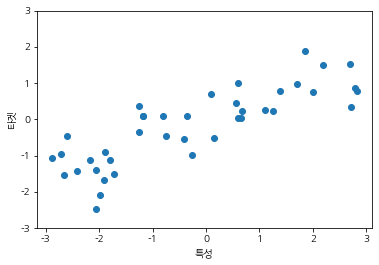

In [44]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타겟')

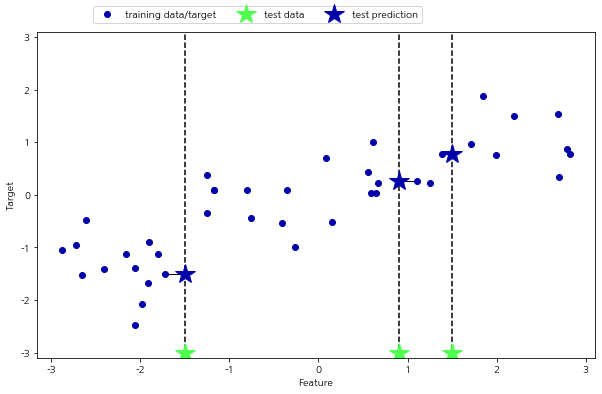

In [45]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

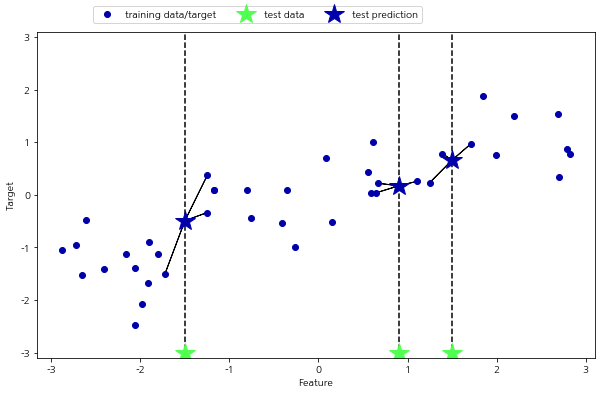

In [46]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [47]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [48]:
print('테스트 세트 예측 : \n', reg.predict(X_test))

테스트 세트 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [49]:
# R2(결정계수) = 설명계수
# R2 = 1 - (타깃 - 예측)^2의 합 / (타깃 - 평균)^2의 합
print('테스트 세트 R2 : {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 R2 : 0.83


### 선형모델

w[0]: 0.393906  b: -0.031804


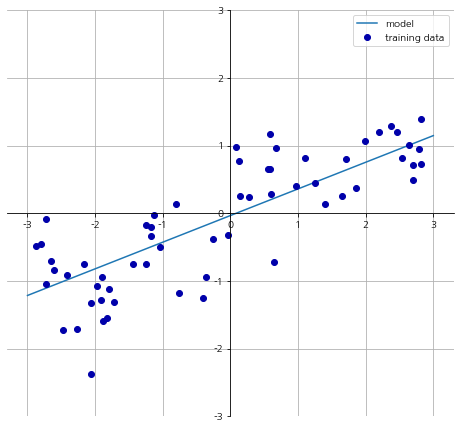

In [50]:
mglearn.plots.plot_linear_regression_wave()

In [51]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [52]:
# 기울기(w) 가중치(weight) 계수(coefficient) : lr.coef_
# 편향(bias, offset), 절편 : lr.intercept_
print('lr.coef_ : {}'.format(lr.coef_))
print('lr.intercept_ : {}'.format(lr.intercept_))

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


In [53]:
print('훈련 데이터의 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 데이터의 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 데이터의 점수 : 0.67
테스트 데이터의 점수 : 0.66


- R2값이 0.66이면 좋은 결과가 아니다.
- 훈련 세트와 테스트 세트의 점수가 매우 비슷하다. 이건 과대적합이 아니라 과소적합인 상태를 의미한다.
- 특성이 적은 선형 모델은 과대적합을 걱정할 필요는 없다. 단 특성이 많은 데이터셋에서 선형 모델의 성능이 매우 높아져서 과대적합이 될 가능성이 높다.

In [54]:
# 보스턴 주택가격 데이터셋, 1970년대 주택 평균 가격을 예측한 것이다.
from sklearn.datasets import load_boston
boston = load_boston()
print('boston.shape : {}'.format(boston.data.shape))

boston.shape : (506, 13)


In [55]:
# 특성 공학 : Feature Engineering
# 특성을 유도해내는 것을 말한다.
X, y = mglearn.datasets.load_extended_boston()
print('X.shape : {}'.format(X.shape))

X.shape : (506, 104)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [57]:
print('훈련 데이터의 점수 : {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 데이터의 점수 : {:.2f}'.format(lr.score(X_test, y_test)))

훈련 데이터의 점수 : 0.95
테스트 데이터의 점수 : 0.61


- 훈련데이터와 테스트데이터의 성능 차이는 모델이 과대적합되었다는 확실한 신호이다. 따라서 복잡도를 제어할 수 있는 모델을 사용해야 한다.
- 릿지 회귀(L2 규제-패널티, 평균제곱오차)와 라쏘 회귀(L1 규제-패널티, 기울기의 절대값)